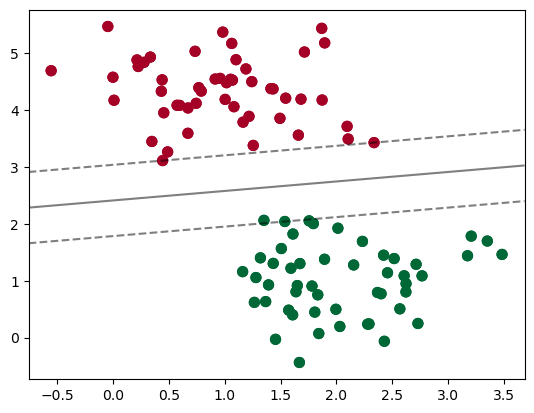

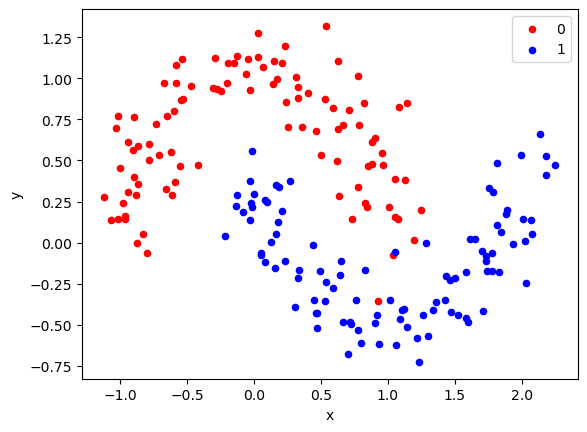

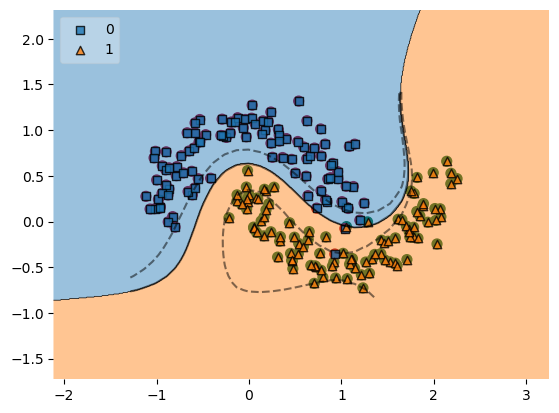

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC  # Import SVC class

# Generate random dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Store in DataFrame
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn');

# Fit the SVC model
model = SVC(kernel='linear')  # You can choose other kernels as well
model.fit(X, y)  # Fit the model to the data

# Function to plot decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
# Plot the model decision boundary
plot_svc_decision_function(model)
plt.show()

# import necessary libraries 
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# generate the data 
X, y = make_moons(n_samples=200, noise = 0.15)

# lets store the data in a data frame 

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

# now lets plot the data 
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
# create two groups of  data based on the label
grouped = df.groupby('label')
# plot each group of data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# create a pipleline for pre-processing and fit the model 
poly_kernel = Pipeline([
    # features of degree three x, x^2 and x^3
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_model",SVC(kernel='poly',gamma='auto',degree=3,coef0=1,C=5))
])

# now fit the data to the model 
clf_poly = poly_kernel.fit(X,y)

# lets plot the results and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plot_svc_decision_function(clf_poly, plot_support=False);

#!pip install mlxtend 
## You might need this if it's not already installed.
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf_poly, legend=2)
plt.show()